**Задание**

**Цель:** Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

**Описание задания:**

В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

2. Проведите первичный анализ.

  а) Проверьте количество записей для каждого класса. Сделайте вывод.

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

6. Обработайте выбросы в данных.

  а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

  b) Исследуйте признаки на выбросы несколькими способами.

  c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

7. Повторите п. 4, п. 5.

8. Сформулируйте выводы по проделанной работе.

  а) Кратко опишите, какие преобразования были сделаны с данными.

  b) Сравните точность двух моделей.
  
  c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

Для получения зачета по этому домашнему заданию минимально должны быть реализованы методы по поиску выбросов и построены две модели: «до» и «после» обработки экстремальных значений.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).**

In [ ]:
data = pd.read_csv('glass.csv')
data[:3]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


В датасете нет пропусков, все признаки числовые.

**2. Проведите первичный анализ.**

In [ ]:
# Сатистики:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


По стат.данным на первый взгляд аномалий нет.

In [ ]:
# Поиск пар коррелирующих между собой признаков; проверка степени влияния признаков на целевую переменную:
data_corr = data.corr()
data_corr.style.background_gradient(cmap='PuBu_r')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


Признаки 'Ca' и 'RI' сильно коррелируют между собой (коэффициент корреляции 0,81). Корреляция между другими признаками есть, но в меньшей степени.

На тип стекла (целевую переменную) сильно влияет содержание алюминия и бария (коэффициенты 0,599 и 0,575 соответственно), также присутствует сильная обратная связь (коэффициент -0,745) между таргетом и содержанием магния. Предположу, что содержание магния, алюминия и бария - это более сильные признаки по сравнению с остальными.

EDA включает проверку наличия выбросов, что выполнено в п.6.

  **а) Проверьте количество записей для каждого класса. Сделайте вывод.**

In [ ]:
# Уникальные значения, котрые принимает целевая переменная:
data.Type.unique()

array([1, 2, 3, 5, 6, 7])

Всего классов 6, количество записей для каждого:

In [ ]:
df_rows = data.groupby('Type').count()
df_rows.iloc[:, 0]

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: RI, dtype: int64

Количество записей между классами распределено неравномерно, т.е. датасет несбалансированный, поэтому деревья решений на таком датасете будут обучаться плохо.

**3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**

In [ ]:
X = data.drop(columns=['Type'])
y = data.Type

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

**4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_forest = RandomForestClassifier(random_state=9)
model_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=9)

**5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model_forest.predict(X_test)

array([2, 2, 1, 2, 3, 1, 2, 1, 2, 1, 7, 3, 2, 3, 1, 1, 1, 2, 2, 5, 1, 1,
       7, 1, 7, 2, 7, 1, 2, 1, 2, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 3, 1])

In [ ]:
acc_forest = accuracy_score(y_test, model_forest.predict(X_test))
acc_forest

0.7674418604651163

Для смягчения влияния дисбаланса классов, найдем оптимальную глубину деревьев  с помощью кросс-валидации (инструмент GridSearchCV библиотеки sklearn).

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Оптимизируемые параметры и диапазоны их значений, из которых будут выбраны оптимальные:
optim_param = {'max_depth':range(1,10)}

# Задание параметров кросс-валидации:
tree_grid = GridSearchCV(model_forest, optim_param, cv=7, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

tree_grid.best_params_

Fitting 7 folds for each of 9 candidates, totalling 63 fits


{'max_depth': 7}

In [ ]:
tree_grid.best_params_['max_depth']

7

Заново обучим модель случайного леса, задав оптимальную глубину. Выведем значение метрики качества.

In [ ]:
model_forest_opt = RandomForestClassifier(max_depth=tree_grid.best_params_['max_depth'], random_state=9)
model_forest_opt.fit(X_train, y_train)
model_forest_opt.predict(X_test)
# Метрика:
acc_forest_opt = accuracy_score(y_test, model_forest.predict(X_test))
acc_forest_opt

0.7674418604651163

Метрика не именилась. Попробуем применить данный инструмент после удаления пропусков.

**6. Обработайте выбросы в данных.**

  **а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?**

In [ ]:
# Имена признаков в датасете:
X.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

Посмотрим на распределения каждого признака с помощью гистограмм.

In [ ]:
elements = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
sns.set(rc={"figure.figsize":(18, 12)})

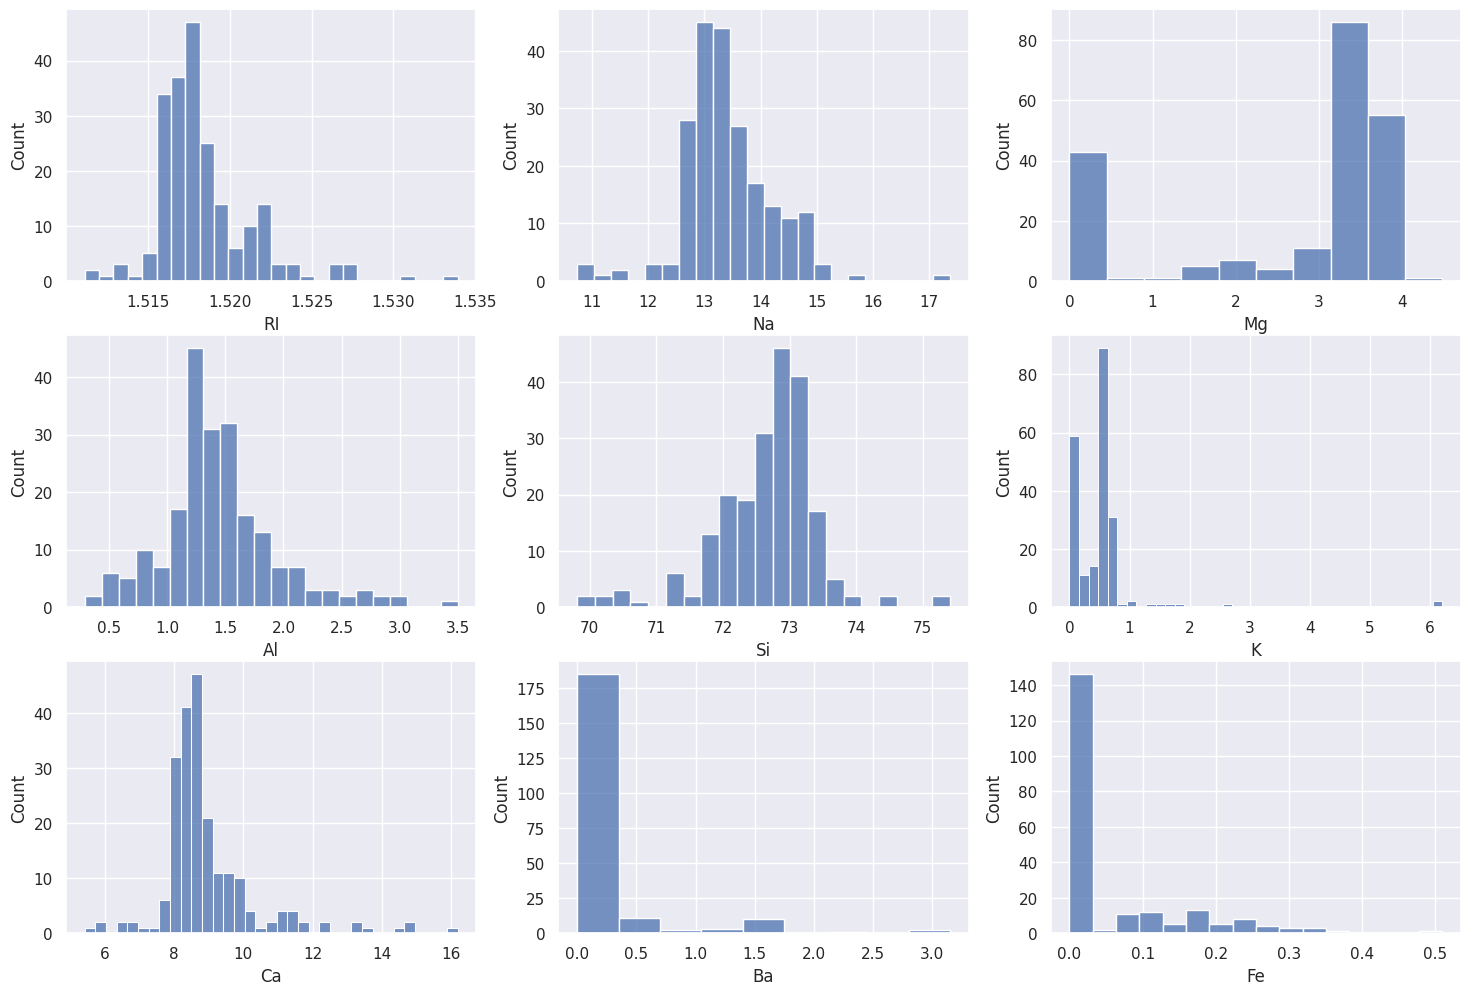

In [ ]:
for i, el in enumerate(elements):
  plt.subplot(3, 3, i+1)
  sns.histplot(X, x=el)

Для всех признаков есть значения, далеко отстающие от основной совокупности, похожие на выбросы.
На нормальные распределения похожи распределения следующих признаков: 'RI', 'Na', 'Al', 'Si', 'Ca'.

Выбросы оценим с помощью боксплотов.

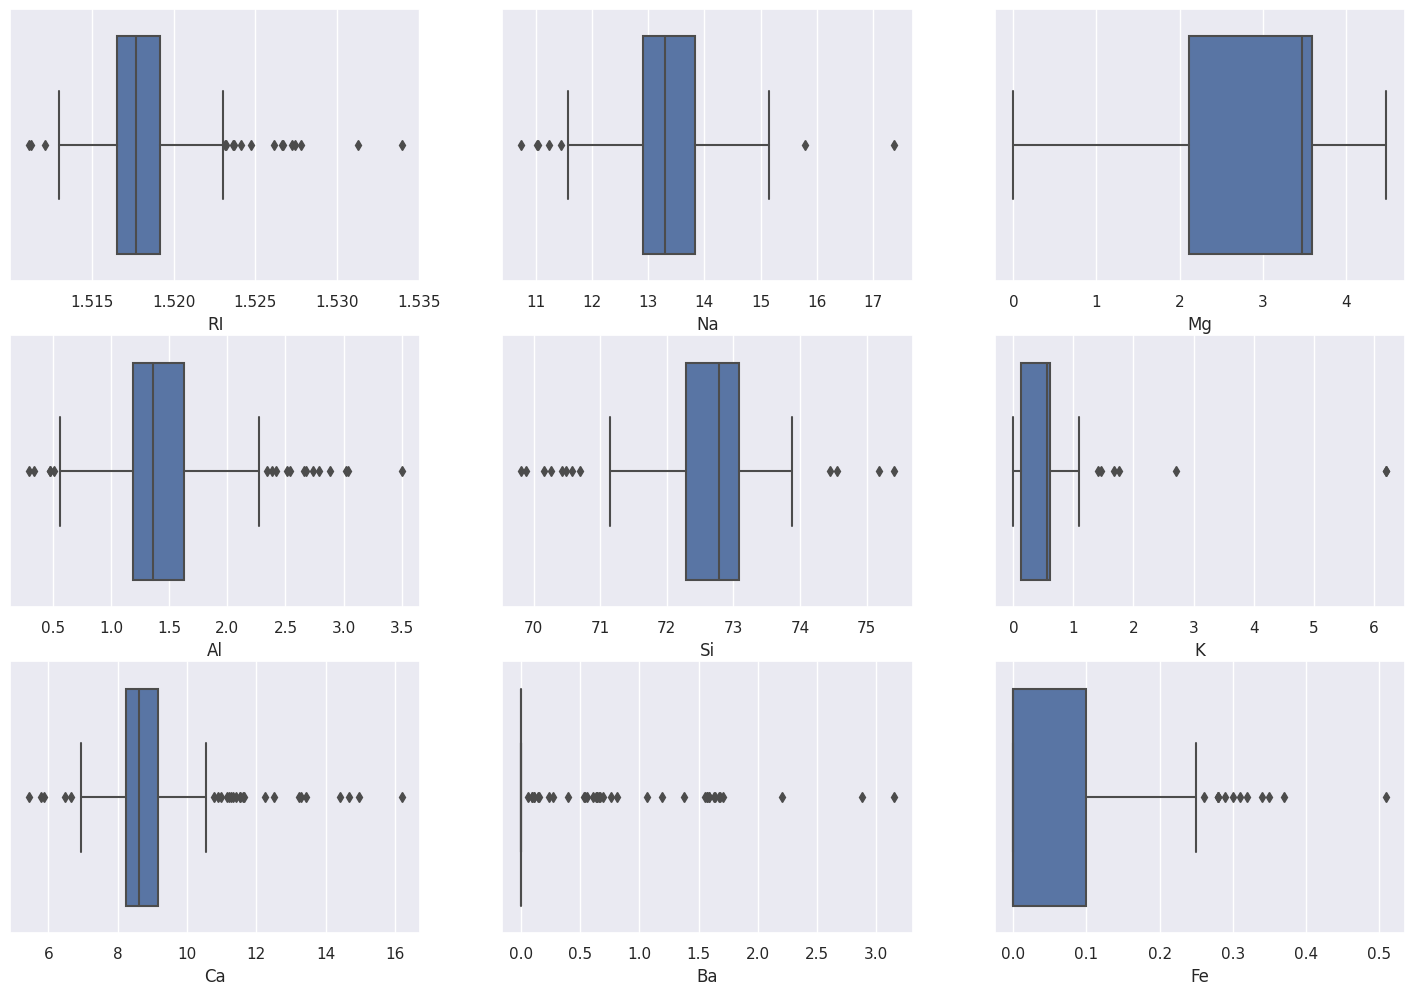

In [ ]:
for i, el in enumerate(elements):
  plt.subplot(3, 3, i+1)
  sns.boxplot(X, x=el)

Судя по боксплотоам, выбросов нет только для признака 'Mg'. Если считать распределения для признаков 'RI', 'Na', 'Al', 'Si', 'Ca' нормальными, то все показханные выбросы можно попробовать удалить. Для остальных признаков нужны дополнительные проверки.

  **b) Исследуйте признаки на выбросы несколькими способами.**

Исследуем признаки на выбросы в цикле методами OneClassSVM, IsolationForest, EllipticEnvelope, LocalOutlierFactor библиотеки sklearn, полученные данные сведем в таблицу.

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
classifiers = {
    "OneClassSVM": OneClassSVM(nu=0.1),
    "IsolationForest": IsolationForest(),
    "EllipticEnvelope": EllipticEnvelope(contamination=0.2),
    "LocalOutlierFactor": LocalOutlierFactor(novelty=True)
}

df_outliers=pd.DataFrame(columns=classifiers.keys())
for (el_name, el) in classifiers.items():
  el.fit(X)
  el.predict(X)
  df_outliers[el_name]=el.predict(X)
df_outliers

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


,OneClassSVM,IsolationForest,EllipticEnvelope,LocalOutlierFactor
0,-1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
209,1,1,-1,1
210,1,1,-1,1
211,1,1,-1,1
212,1,1,-1,1


В полученную таблицу добавим столбец с суммой построчно, отсортируем таблицу по возрастанию значений в новом столбце. Таким образом увидим строки (объекты) с самым большим количеством выбросов.

In [ ]:
df_outliers['Sum'] = df_outliers[['OneClassSVM',	'IsolationForest',	'EllipticEnvelope',	'LocalOutlierFactor']].sum(axis=1)
df_outliers.sort_values(by=['Sum'], ascending=True)[:5]

,OneClassSVM,IsolationForest,EllipticEnvelope,LocalOutlierFactor,Sum
106,-1,-1,-1,-1,-4
107,-1,-1,-1,-1,-4
207,-1,-1,-1,-1,-4
163,-1,-1,-1,-1,-4
171,-1,-1,-1,-1,-4


  **c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.**

**7. Повторите п. 4, п. 5.**

В колонке 'Sum' таблицы df_outliers значения тем меньше, чем больше моделей посчитало данный объект выбросом.

Сравним метрики качества для датасета с разным количеством удаленных строк с выбросами.
Для этого в цикле будем удалять строки, которые:
* все исследуемые модели посчитали выбросами ('Sum" = -4),
* три из четырех исследуемых моделей посчитали выбросами ('Sum" = -2),
* половина исследуемых моделей посчитала выбросами ('Sum" = 0).

In [ ]:
outliers_numb = [2, 0, -2]
for i in outliers_numb:
  df_outliers_all = df_outliers[df_outliers.Sum<i] # Подсчёт количества объектов-выбросов

  print(f'Количество выбросов={df_outliers_all.shape[0]} ({df_outliers_all.shape[0] * 100 / data.shape[0]:.2f}% от общего числа объектов)')

  outliers_list = df_outliers_all.index.tolist() # Индексы строк с выбросами

  data_new = data.drop(index=outliers_list) # Исходный датафрейм без выбросов

  # Массив признаков и серия с целевой переменной:
  X_new = data_new.drop(columns=['Type'])
  y_new = data_new.Type

  # Выборки train и test, обучение модели:
  X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=9)
  model_forest_new = RandomForestClassifier(random_state=9)
  model_forest_new.fit(X_new_train, y_new_train)

  # Метрика качества
  acc_forest_new = accuracy_score(y_new_test, model_forest_new.predict(X_new_test))
  print(f'Accuracy: {acc_forest_new:.4f}')

Количество выбросов=24 (11.21% от общего числа объектов)
Accuracy: 0.6842
Количество выбросов=17 (7.94% от общего числа объектов)
Accuracy: 0.7500
Количество выбросов=10 (4.67% от общего числа объектов)
Accuracy: 0.7805


Самая большая метрика соответствует наименьшему удаленному количеству объектов с выбросами.

Попробуем еще улучшить accuracy датасета без выбросов, оптимизировав параметр `max_depth` с помощью GridSearchCV.

In [ ]:
# Оптимизируемый параметр:
optim_param = {'max_depth':range(1,15)}

# Задание параметров кросс-валидации:
tree_grid = GridSearchCV(model_forest_new, optim_param, cv=4, n_jobs=-1, verbose=True)

tree_grid.fit(X_new_train, y_new_train)

tree_grid.best_params_

Fitting 4 folds for each of 14 candidates, totalling 56 fits


{'max_depth': 7}

In [ ]:
tree_grid.best_params_['max_depth']

7

In [ ]:
model_forest_opt = RandomForestClassifier(max_depth=tree_grid.best_params_['max_depth'], random_state=9) # min_samples_leaf=6,
model_forest_opt.fit(X_new_train, y_new_train)
model_forest_opt.predict(X_new_test)
# Метрика:
acc_forest_opt = accuracy_score(y_new_test, model_forest.predict(X_new_test))
acc_forest_opt

0.8536585365853658

In [ ]:
acc_forest_opt-acc_forest_new

0.07317073170731703

Метрика улучшилась.

**8. Сформулируйте выводы по проделанной работе.**

  **а) Кратко опишите, какие преобразования были сделаны с данными.**

- Выполнен поиск выбросов с помощью статистических методов и моделей машинного обучения (OneClassSVM, IsolationForest, EllipticEnvelope и LocalOutlierFactor). Вторые применение моделей ML более эффективно, т.к. не все признаки в датасете распределены нормально.

- Выполнено удаление разного количества выбросов с отслеживанием метрики accuracy.

- Выполнена оптимизация глубины деревьев модели "Случайный лес" с помощью GridSearchCV до и после удаления выбросов. До удаления выбросов оптимизация глубины не дала улучшения метрики качества (предполагаю, что это произошло вследствие преобладания негативного влияния на метрику выбросов). После удаления пропусков оптимизация позволила улучшить метрику на несколько процентов.

  **b) Сравните точность двух моделей.**

Из таблицы видно последовательное улучшение метрики accuracy после удаления выбросов и последующей оптимизации глубины деревьев модели "Случайный лес".

In [ ]:
pd.DataFrame({'Model': ['Random Forest', 'Random Forest without outliers', 'Random Forest_opt'], 'Accuracy':[acc_forest, acc_forest_new, acc_forest_opt]})

,Model,Accuracy
0,Random Forest,0.767442
1,Random Forest without outliers,0.829268
2,Random Forest_opt,0.853659


  **c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.**

Выбросы значительно влияют на качество модели, их поиск и удаление - один из основных способов подготовки датасета для построения модели. Уже только за счет удаления выбросов можно сильно улучшить метрику качества.

Лучший результат при выявлении выбросов дает параллельное использование нескольких методов, такой подход дает возможность убедиться в том, что выбранные объекты действительно содержат выбросы.

Минусы подхода - в дополнительных затратах времени и увеличении строк кода, т.к. в итоге необходимо выбрать, какое именно количество объектов отнести к выбросам, что выполняется экспериментально, с отслеживанием метрики качества.